In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow

In [22]:
#Importing dataset
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Preprocessing, Creating dummy variables
x= df.iloc[:,3:13]
y=df.iloc[:,13]
cat_cols = ["Geography","Gender"]
x = pd.get_dummies(x,columns=cat_cols,drop_first=True)

In [24]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [25]:
# Spliting dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [35]:
#Importing keras and other libraries to build ANN Model 
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyRely, Prely, ELU
from keras.layers import Dropout

In [68]:
#Building ANN Model
model = Sequential()
# Input Layer and 1st Hidden Layer
model.add(Dense(units =10, kernel_initializer='he_uniform', activation='relu', input_dim=11))
# 2nd Hidden Layer
model.add(Dense(units= 20, kernel_initializer='he_uniform', activation='relu', ))
# 3rd Hidden Layer
model.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', ))
# Output Layer
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))


In [69]:
# Model Compilation
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
# Fiting the model to the training dataset
model_fit= model.fit(x_train, y_train, validation_split= 0.3, batch_size= 15, epochs= 50)

Epoch 1/50
374/374 [==============================] - 2s 3ms/step - loss: 0.5597 - accuracy: 0.7471 - val_loss: 0.5205 - val_accuracy: 0.7904
Epoch 2/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4964 - accuracy: 0.8002 - val_loss: 0.4926 - val_accuracy: 0.7967
Epoch 3/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4695 - accuracy: 0.8114 - val_loss: 0.4746 - val_accuracy: 0.8037
Epoch 4/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.8170 - val_loss: 0.4611 - val_accuracy: 0.8042
Epoch 5/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8184 - val_loss: 0.4499 - val_accuracy: 0.8087
Epoch 6/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.8221 - val_loss: 0.4416 - val_accuracy: 0.8108
Epoch 7/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4178 - accuracy: 0.8241 - val_loss: 0.4325 - val_accuracy: 0.8125
Epoch 

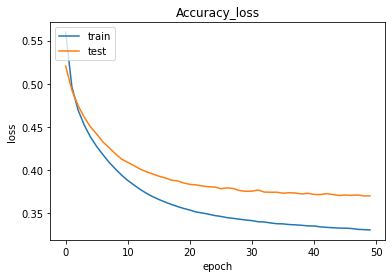

In [71]:
# Graph for Loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Accuracy_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

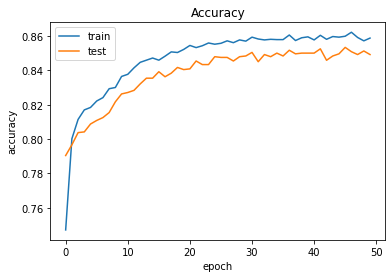

In [72]:
# Graph for Model Accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [73]:
# Check the Test dataset
y_pred= model.predict(x_test)
y_pred= (y_pred>0.5)

In [74]:
# To Print confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred, y_test)
cm

array([[1514,  207],
       [  81,  198]])